# Logistics Regression from scratch
Python based

by Tanat Metmaolee

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For Dataset & Train, Test
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Base Knowledge

### Type of Logistic Regression
1. Binomial
2. Multinomial
3. Ordinal

### Hyperparameters
- `w` = Weight
- `b` = Bias
- `L` = Learning Rate
- `epochs` = Number of epochs

In [2]:
w = 0
b = 0
L = 0.01
epochs = 1000

### Sigmoid Function

$\sigma(z) = \frac{1}{1+e^{-z}}$
​

while $ z = w_{i} x_{i} + ... + w_{1} x_{1} + b $

, $i$ stands for the number of features in the dataset.


### Confusion Matrix

## Implementation

In [3]:
class LogisticRegression():
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None
        self.losses = []
        
    def _cost_function(self, y, y_predict):
        n_samples = len(y)
        cost = - (1 / n_samples) * np.sum(y * np.log(y_predict + 1e-9) + (1 - y) * np.log(1 - y_predict + 1e-9))
        return cost
        
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        
        for epoch in range(self.epochs):
            y_pred = self.sigmoid(self.linear_model(X))
            # Store each loss at the current epoch
            self.losses.append(self._cost_function(y, y_pred))
            # Compute Gradient Descent
            self._gradient_descent(X, y, y_pred)
        
        return self
        
    def _gradient_descent(self, X, y, y_pred):
        m = X.shape[0]
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)
        
        self.w -= (self.learning_rate * dw)
        self.b -= (self.learning_rate * db)
        
        return self
    
    def linear_model(self, X):
        return np.dot(X, self.w) + self.b
    
    def sigmoid(self, z):
        # Calculate probability for logistic regression model
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X, threshold=0.5):
        # Converts Probability from the sigmoid to a binary class (0 or 1)
        y_pred = self.sigmoid(self.linear_model(X))
        # Current Threshold = 0.5
        return np.where(y_pred > threshold, 1, 0)

## Main

Accuracy: 0.88


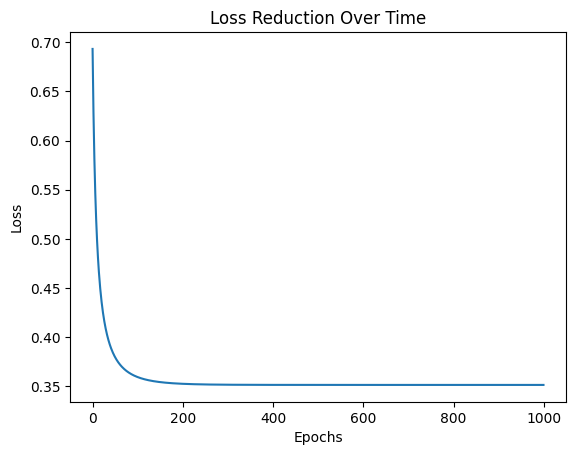

In [4]:
# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the loss over epochs (optional)
import matplotlib.pyplot as plt

plt.plot(range(len(model.losses)), model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Reduction Over Time")
plt.show()

## Challenge

### Model Accuracy

### Confusion Matrix